In [ ]:
!pip install yfinance --upgrade
!pip install plotly
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf #Instalando e importando a API no código
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

Baixar Dados Reais

In [ ]:
codigos_acoes = ['BBDC4', 'LREN3', 'RAIL3']
data_inicio = '2020-01-01'
data_fim = datetime.now().strftime('%Y-%m-%d')
dados_acoes = {}

print("Iniciando download dos dados...\n")

for codigo in codigos_acoes:
    try:
        dados = yf.download(f'{codigo}.SA',
                            start=data_inicio,
                            end=data_fim,
                            progress=False)
        if not dados.empty:
            dados_acoes[codigo] = dados
            print(f" {codigo} - Dados baixados (de {dados.index[0].date()} a {dados.index[-1].date()})\n")
        else:
            print(f" {codigo} - Nenhum dado disponível\n")
    except Exception as e:
        print(f" {codigo} - Erro: {str(e)}\n")

print("Download concluído!")

Iniciando download dos dados...

YF.download() has changed argument auto_adjust default to True
 BBDC4 - Dados baixados (de 2020-01-02 a 2025-04-14)

 LREN3 - Dados baixados (de 2020-01-02 a 2025-04-14)

 RAIL3 - Dados baixados (de 2020-01-02 a 2025-04-14)

Download concluído!


Visualização dos Dados

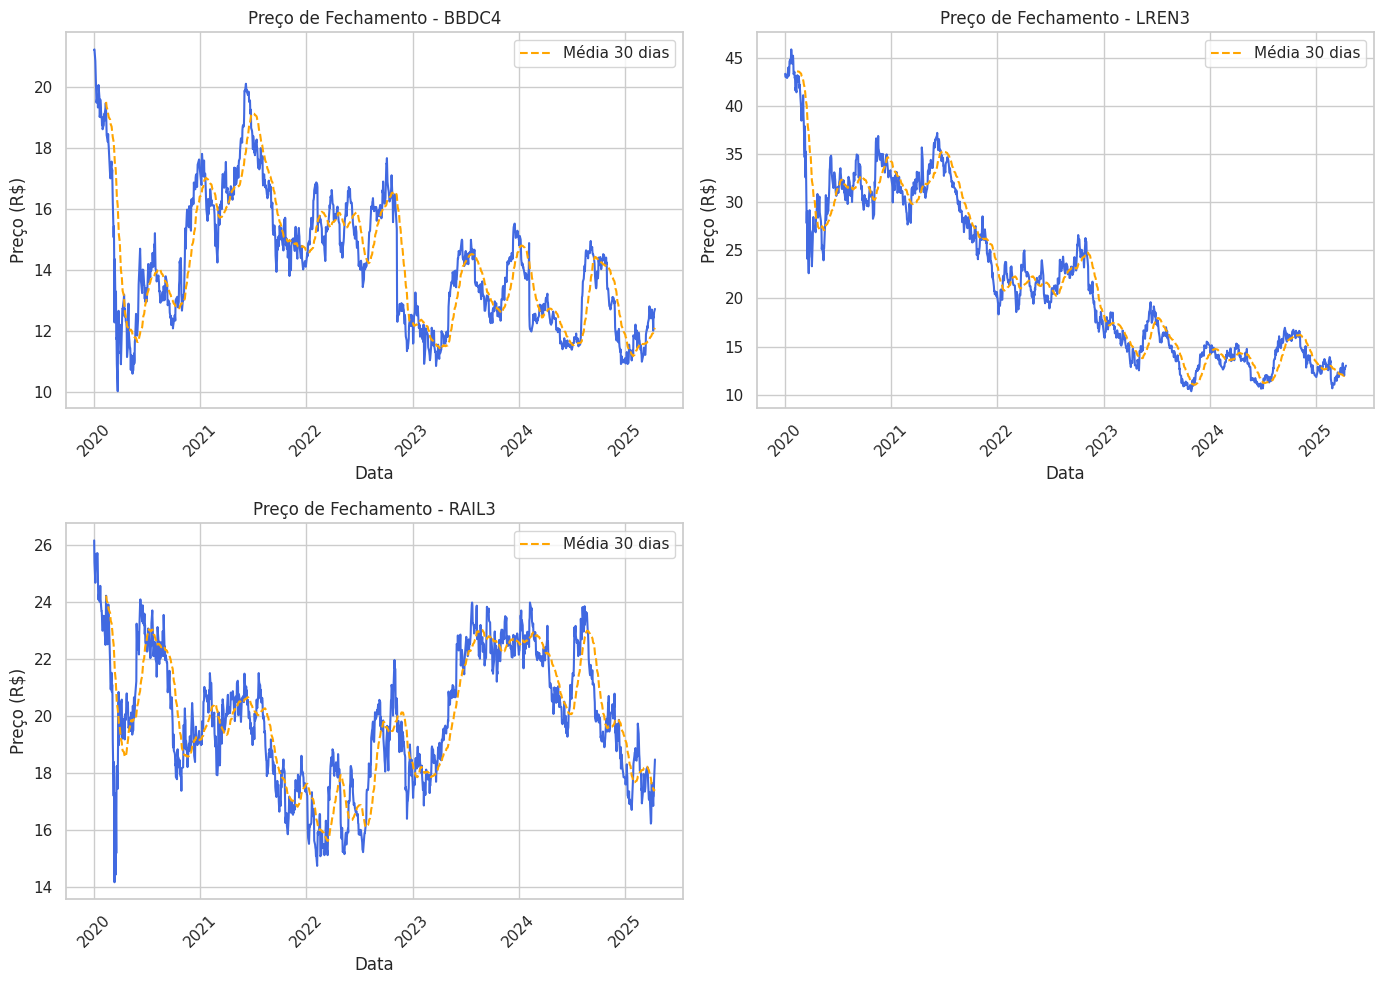

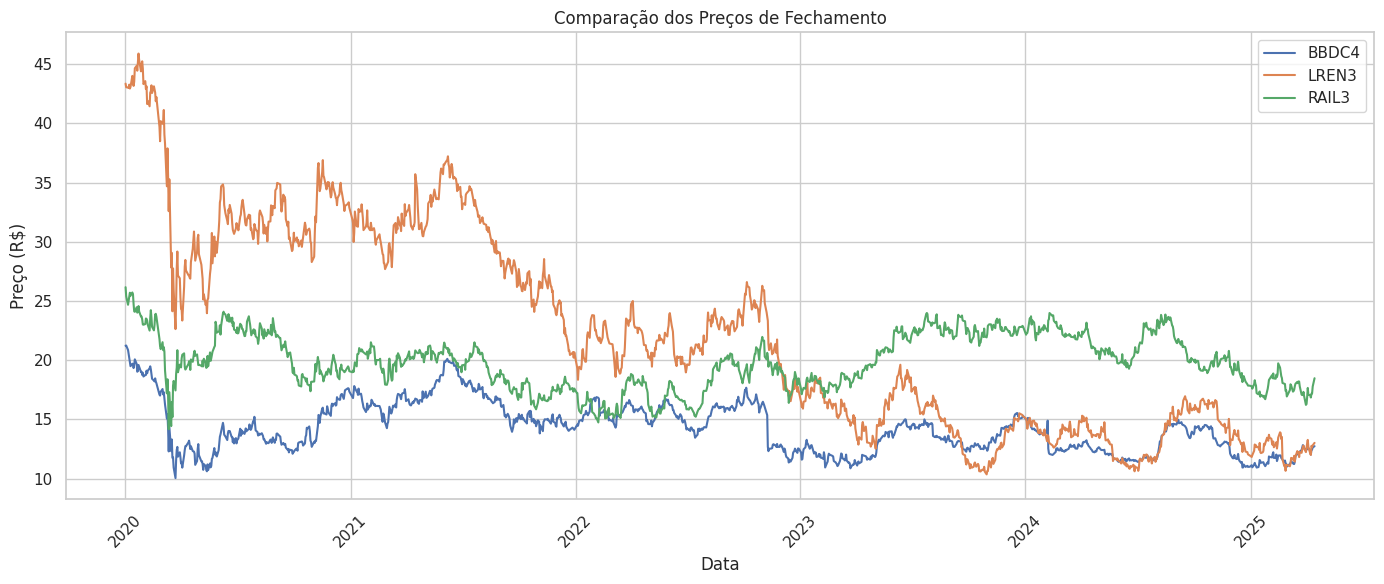

In [ ]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Criando gráficos individuais para cada ativo
for i, (codigo, dados) in enumerate(dados_acoes.items(), 1):
    # Prepara os dados para plotagem - garantindo que sejam 1D
    plot_data = pd.DataFrame({
        'Data': dados.index.to_numpy(),  # Converte para array numpy
        'Close': dados['Close'].to_numpy().flatten(),  # Garante 1D
        'MA30': dados['Close'].rolling(window=30).mean().to_numpy().flatten()
    })

    # Gráfico de linha do preço de fechamento
    plt.subplot(2, 2, i)
    sns.lineplot(data=plot_data, x='Data', y='Close', color='royalblue')
    plt.title(f'Preço de Fechamento - {codigo}')
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.xticks(rotation=45)

    # Adiciona média móvel de 30 dias
    sns.lineplot(data=plot_data, x='Data', y='MA30', color='orange', linestyle='--', label='Média 30 dias')
    plt.legend()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

# Gráfico combinado para comparação
plt.figure(figsize=(14, 6))
comparison_data = pd.DataFrame()

for codigo, dados in dados_acoes.items():
    temp_df = pd.DataFrame({
        'Data': dados.index.to_numpy(),
        'Close': dados['Close'].to_numpy().flatten(),
        'Ativo': codigo
    })
    comparison_data = pd.concat([comparison_data, temp_df])

sns.lineplot(data=comparison_data, x='Data', y='Close', hue='Ativo')
plt.title('Comparação dos Preços de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

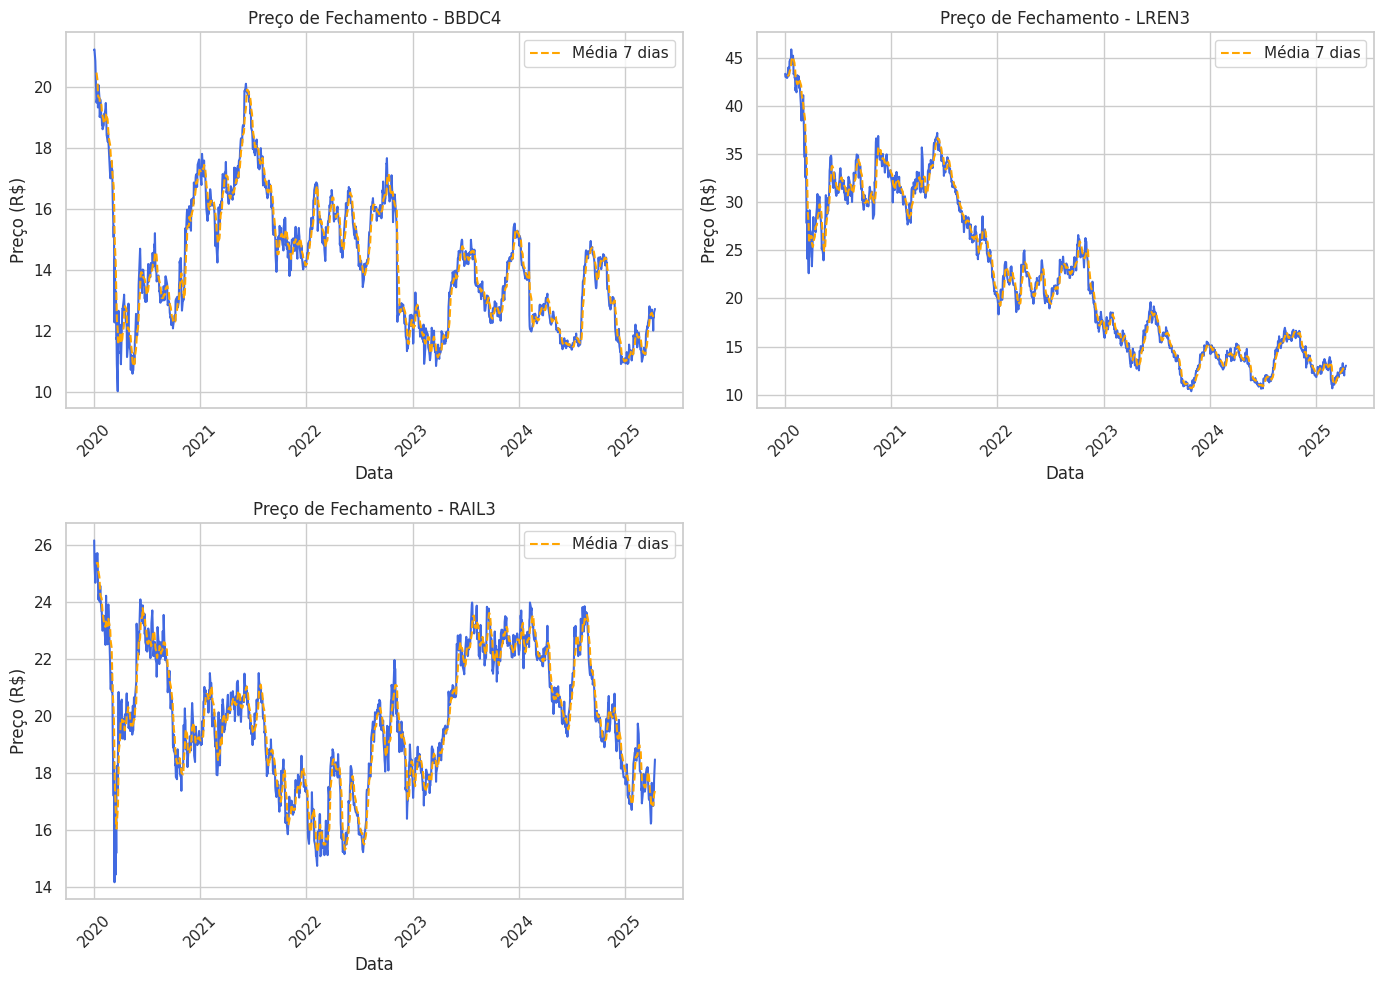

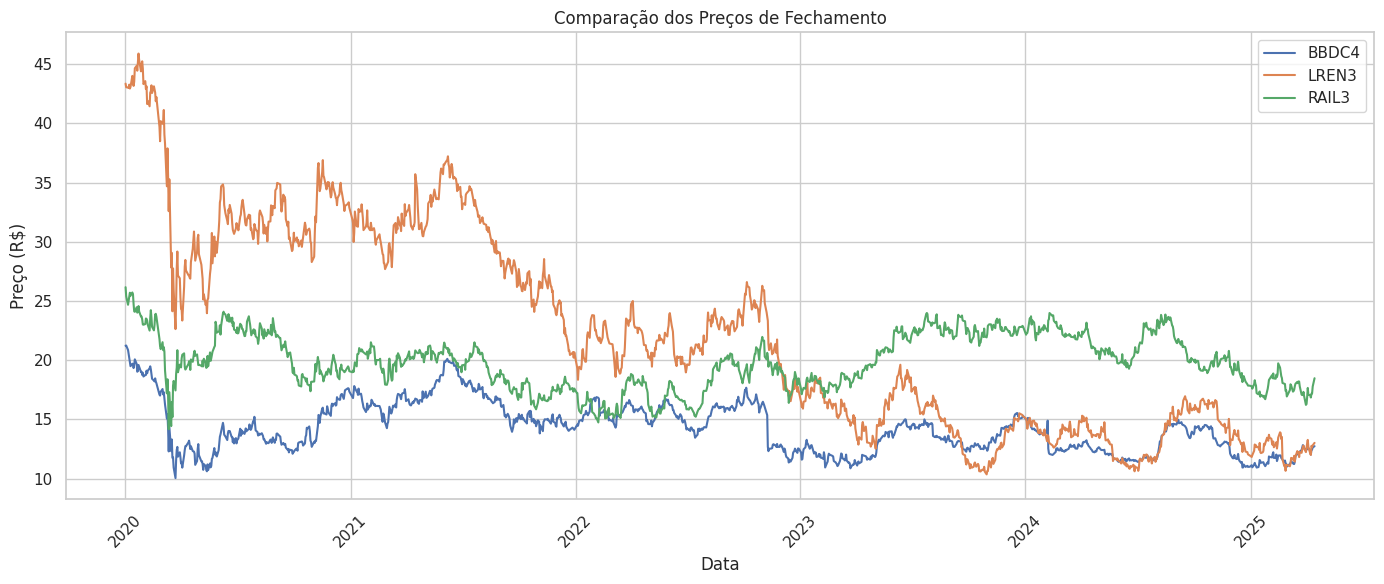

In [ ]:
# Configuração do estilo dos gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Criando gráficos individuais para cada ativo
for i, (codigo, dados) in enumerate(dados_acoes.items(), 1):
    # Prepara os dados para plotagem - garantindo que sejam 1D
    plot_data = pd.DataFrame({
        'Data': dados.index.to_numpy(),  # Converte para array numpy
        'Close': dados['Close'].to_numpy().flatten(),  # Garante 1D
        'MA30': dados['Close'].rolling(window=30).mean().to_numpy().flatten(),
        'MA7': dados['Close'].rolling(window=7).mean().to_numpy().flatten()
    })

    # Gráfico de linha do preço de fechamento
    plt.subplot(2, 2, i)
    sns.lineplot(data=plot_data, x='Data', y='Close', color='royalblue')
    plt.title(f'Preço de Fechamento - {codigo}')
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.xticks(rotation=45)

    # Adiciona média móvel de 30 dias
    sns.lineplot(data=plot_data, x='Data', y='MA7', color='orange', linestyle='--', label='Média 7 dias')
    plt.legend()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

# Gráfico combinado para comparação
plt.figure(figsize=(14, 6))
comparison_data = pd.DataFrame()

for codigo, dados in dados_acoes.items():
    temp_df = pd.DataFrame({
        'Data': dados.index.to_numpy(),
        'Close': dados['Close'].to_numpy().flatten(),
        'Ativo': codigo
    })
    comparison_data = pd.concat([comparison_data, temp_df])

sns.lineplot(data=comparison_data, x='Data', y='Close', hue='Ativo')
plt.title('Comparação dos Preços de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Cálculo dos Retornos


Calculando retornos...


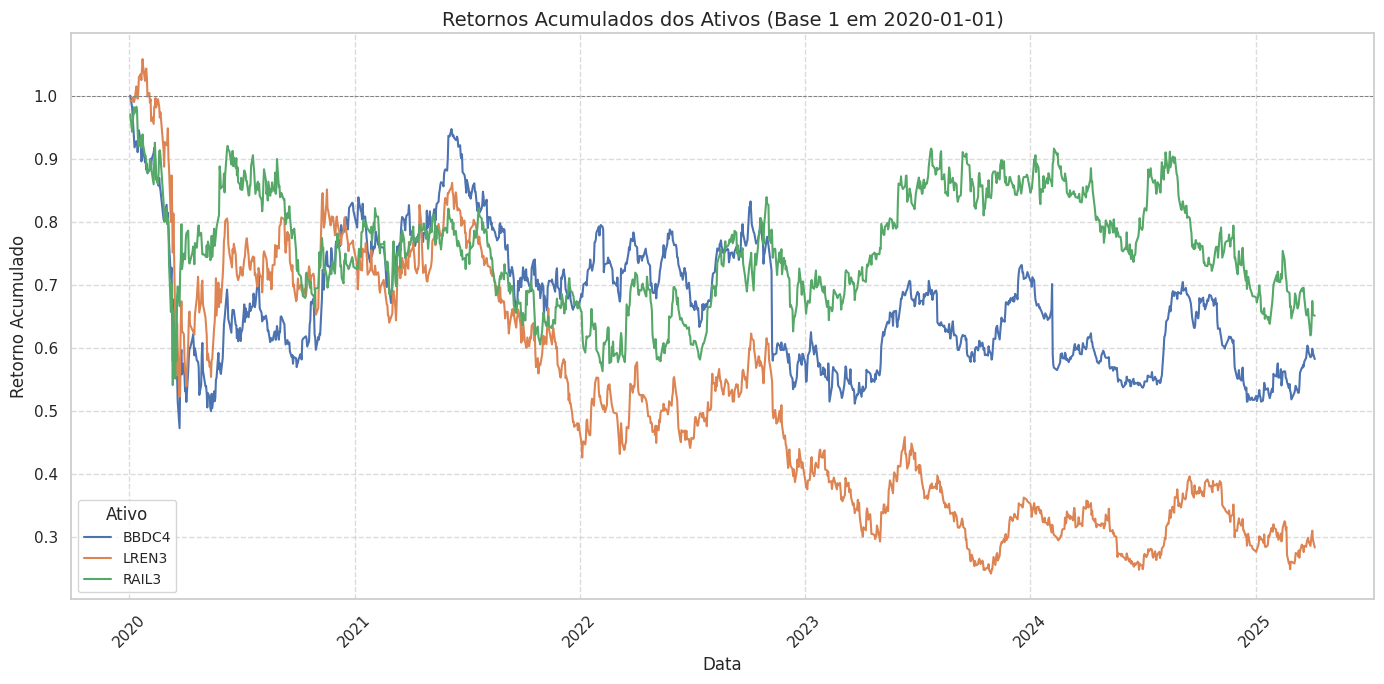

In [ ]:
# Cálculo dos retornos diários e acumulados
print("\nCalculando retornos...")
retornos_lista = []

for codigo, dados in dados_acoes.items():
    # Verifica e remove duplicatas
    dados = dados[~dados.index.duplicated(keep='first')]

    # Calcula retornos
    dados['Retorno_Diario'] = dados['Close'].pct_change()
    dados['Retorno_Acumulado'] = (1 + dados['Retorno_Diario']).cumprod()

    # Prepara dados para o DataFrame
    temp_df = pd.DataFrame({
        'Data': dados.index,
        'Retorno_Acumulado': dados['Retorno_Acumulado'],
        'Ativo': codigo
    })
    retornos_lista.append(temp_df)

# Concatena todos os dados de retorno
retornos = pd.concat(retornos_lista).reset_index(drop=True)

# Gráfico comparativo dos retornos acumulados
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Verifica se há dados para plotar
if not retornos.empty:
    sns.lineplot(data=retornos, x='Data', y='Retorno_Acumulado', hue='Ativo', errorbar=None)

    plt.title('Retornos Acumulados dos Ativos (Base 1 em 2020-01-01)', fontsize=14)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Retorno Acumulado', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Ativo', title_fontsize=12, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adiciona linha de base em 1
    plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.7)

    plt.tight_layout()
    plt.show()
else:
    print("Nenhum dado válido para plotar o gráfico de retornos.")

Histograma do Ativo com Melhor retorno

Iniciando download dos dados...

 BBDC4 - Retorno total: -41.76%
 LREN3 - Retorno total: -71.65%
 RAIL3 - Retorno total: -34.86%

Download e cálculo de retornos concluídos!

O ativo com maior retorno foi RAIL3 com -34.86% no período


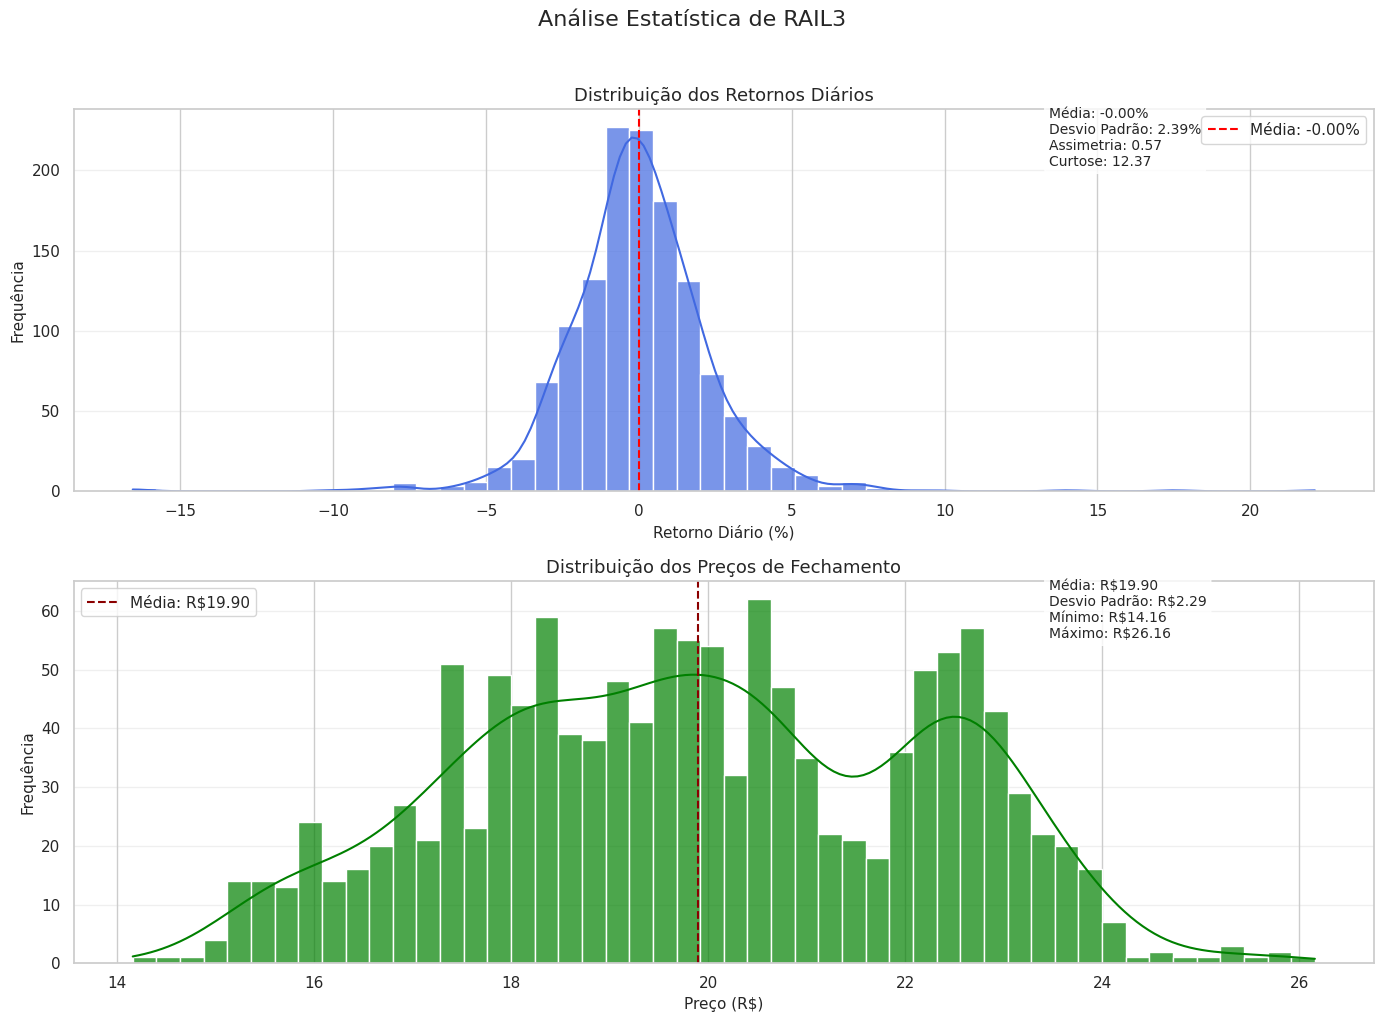


Estatísticas Detalhadas para RAIL3:
                     Média   Mediana Desvio Padrão    Máximo     Mínimo
Retornos Diários  -0.0043%  -0.0570%       2.3917%  22.1134%  -16.5616%
Preços             R$19.90   R$19.84        R$2.29   R$26.16    R$14.16


In [ ]:
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuração inicial
codigos_acoes = ['BBDC4', 'LREN3', 'RAIL3']
data_inicio = '2020-01-01'
data_fim = datetime.now().strftime('%Y-%m-%d')

print("Iniciando download dos dados...\n")

# Baixa e processa os dados
dados_acoes = {}
retornos_totais = {}

for codigo in codigos_acoes:
    try:
        dados = yf.download(f'{codigo}.SA', start=data_inicio, end=data_fim, progress=False)
        if not dados.empty:
            # Remove duplicatas e garante dados limpos
            dados = dados[~dados.index.duplicated(keep='first')].copy()

            # Calcula retornos
            dados['Retorno_Diario'] = dados['Close'].pct_change()
            dados['Retorno_Acumulado'] = (1 + dados['Retorno_Diario']).cumprod()

            # Armazena os dados
            dados_acoes[codigo] = dados

            # Calcula o retorno total no período
            retorno_total = float(dados['Retorno_Acumulado'].iloc[-1] - 1)
            retornos_totais[codigo] = retorno_total

            print(f" {codigo} - Retorno total: {retorno_total:.2%}")
        else:
            print(f" {codigo} - Nenhum dado disponível")
    except Exception as e:
        print(f" {codigo} - Erro no processamento: {str(e)}")

print("\nDownload e cálculo de retornos concluídos!")

# Identifica o ativo com maior retorno
if retornos_totais:
    melhor_ativo = max(retornos_totais.items(), key=lambda x: x[1])[0]
    melhor_retorno = retornos_totais[melhor_ativo]
    print(f"\nO ativo com maior retorno foi {melhor_ativo} com {melhor_retorno:.2%} no período")

    # Garante que os dados estão no formato correto
    dados_melhor = dados_acoes[melhor_ativo]

    # Converte explicitamente para arrays 1D
    precos = dados_melhor['Close'].to_numpy().flatten()
    retornos_diarios = dados_melhor['Retorno_Diario'].dropna().to_numpy().flatten()

    # Verifica se há dados suficientes
    if len(precos) == 0 or len(retornos_diarios) == 0:
        print("\nErro: Dados insuficientes para gerar gráficos")
    else:
        # Configuração da figura
        plt.figure(figsize=(14, 10))
        sns.set_style("whitegrid")
        plt.suptitle(f'Análise Estatística de {melhor_ativo}', fontsize=16, y=1.02)

        # Primeiro subplot: Histograma dos Retornos Diários
        plt.subplot(2, 1, 1)
        sns.histplot(
            x=retornos_diarios * 100,  # Convertendo para porcentagem
            bins=50,
            kde=True,
            color='royalblue',
            edgecolor='white',
            alpha=0.7
        )

        # Linha vertical na média
        media_ret = np.mean(retornos_diarios) * 100
        plt.axvline(media_ret, color='red', linestyle='--', linewidth=1.5,
                    label=f'Média: {media_ret:.2f}%')

        plt.title('Distribuição dos Retornos Diários', fontsize=13)
        plt.xlabel('Retorno Diário (%)', fontsize=11)
        plt.ylabel('Frequência', fontsize=11)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)

        # Adiciona informações estatísticas
        stats_text = f"""Média: {media_ret:.2f}%
Desvio Padrão: {np.std(retornos_diarios) * 100:.2f}%
Assimetria: {pd.Series(retornos_diarios).skew():.2f}
Curtose: {pd.Series(retornos_diarios).kurtosis():.2f}"""
        plt.annotate(
            stats_text,
            xy=(0.75, 0.85),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10
        )

        # Segundo subplot: Histograma dos Preços de Fechamento
        plt.subplot(2, 1, 2)
        sns.histplot(
            x=precos,
            bins=50,
            kde=True,
            color='green',
            edgecolor='white',
            alpha=0.7
        )

        # Linha vertical na média
        media_preco = np.mean(precos)
        plt.axvline(media_preco, color='darkred', linestyle='--', linewidth=1.5,
                    label=f'Média: R${media_preco:.2f}')

        plt.title('Distribuição dos Preços de Fechamento', fontsize=13)
        plt.xlabel('Preço (R$)', fontsize=11)
        plt.ylabel('Frequência', fontsize=11)
        plt.legend()
        plt.grid(axis='y', alpha=0.3)

        # Adiciona informações estatísticas
        stats_text = f"""Média: R${media_preco:.2f}
Desvio Padrão: R${np.std(precos):.2f}
Mínimo: R${np.min(precos):.2f}
Máximo: R${np.max(precos):.2f}"""
        plt.annotate(
            stats_text,
            xy=(0.75, 0.85),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10
        )

        plt.tight_layout()
        plt.show()

        # Mostra estatísticas adicionais no console
        print(f"\nEstatísticas Detalhadas para {melhor_ativo}:")
        stats_df = pd.DataFrame({
            'Retornos Diários': {
                'Média': f"{np.mean(retornos_diarios) * 100:.4f}%",
                'Mediana': f"{np.median(retornos_diarios) * 100:.4f}%",
                'Desvio Padrão': f"{np.std(retornos_diarios) * 100:.4f}%",
                'Máximo': f"{np.max(retornos_diarios) * 100:.4f}%",
                'Mínimo': f"{np.min(retornos_diarios) * 100:.4f}%"
            },
            'Preços': {
                'Média': f"R${np.mean(precos):.2f}",
                'Mediana': f"R${np.median(precos):.2f}",
                'Desvio Padrão': f"R${np.std(precos):.2f}",
                'Máximo': f"R${np.max(precos):.2f}",
                'Mínimo': f"R${np.min(precos):.2f}"
            }
        }).T
        print(stats_df)

else:
    print("\nNenhum dado válido para análise.")

[*********************100%***********************]  1 of 1 completed



Métricas de Avaliação:
Treino - RMSE: 1.86, MAE: 1.52, R²: 0.17
Teste  - RMSE: 1.07, MAE: 0.91, R²: -0.27

Erro Padrão dos Resíduos: 1.86

Previsões para os próximos 6 meses:
2025-05-14: R$ 12.47 (Intervalo: R$ 8.81 - R$ 16.13)
2025-06-13: R$ 12.42 (Intervalo: R$ 8.76 - R$ 16.08)
2025-07-13: R$ 12.38 (Intervalo: R$ 8.72 - R$ 16.03)
2025-08-12: R$ 12.33 (Intervalo: R$ 8.67 - R$ 15.99)
2025-09-11: R$ 12.28 (Intervalo: R$ 8.62 - R$ 15.94)
2025-10-11: R$ 12.23 (Intervalo: R$ 8.57 - R$ 15.89)


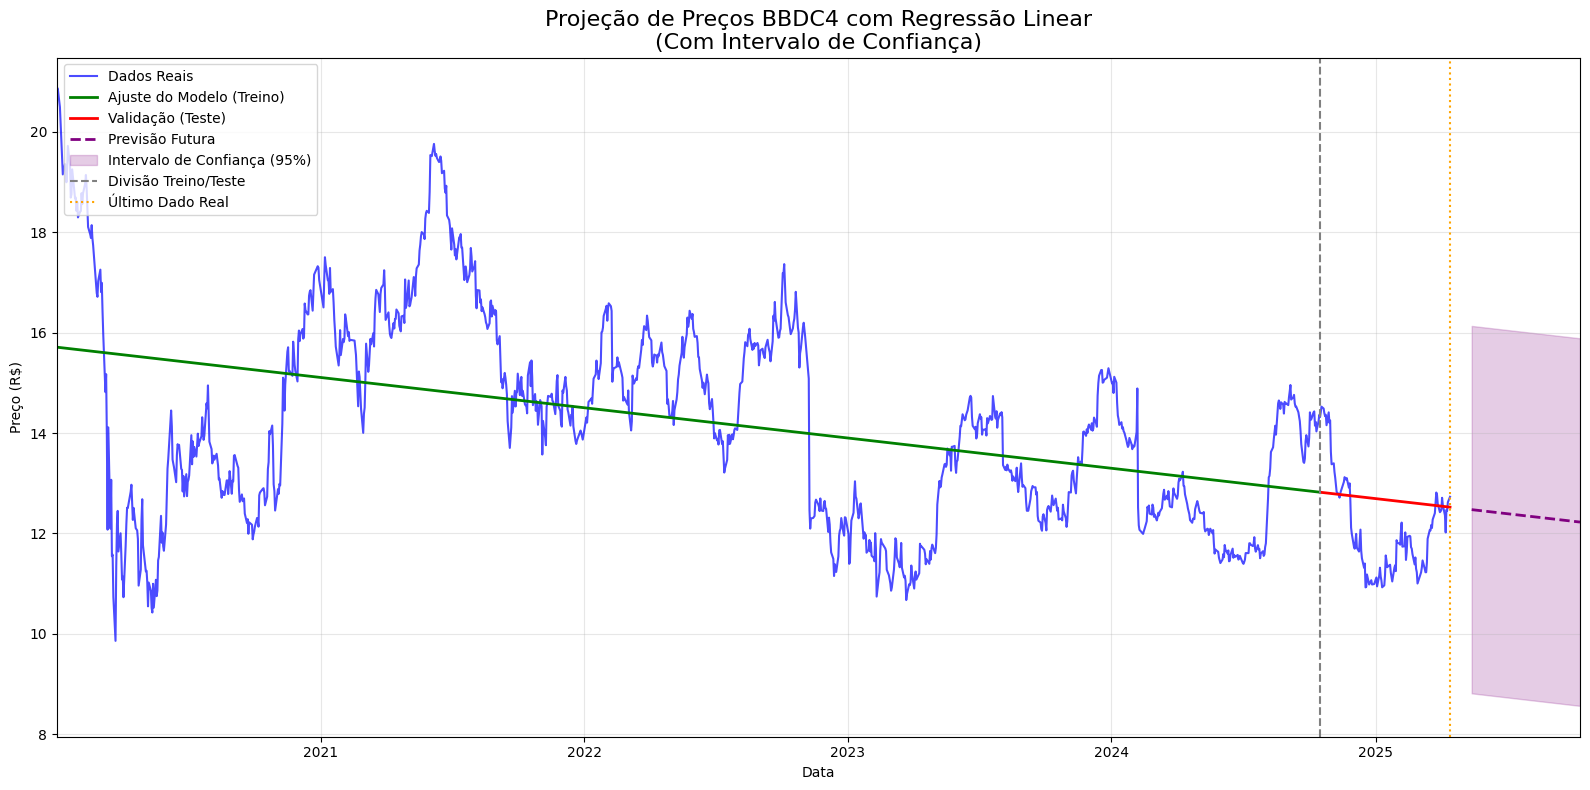


Equação do Modelo: Preço = 1233.68 + -0.001652 * Data


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

# 1. Obter e preparar dados
def get_data():
    codigo = 'BBDC4.SA'
    data_inicio = '2020-01-01'
    data_fim = datetime.now().strftime('%Y-%m-%d')

    df = yf.download(codigo, start=data_inicio, end=data_fim)[['Close']]
    df = df.rename(columns={'Close': 'Preco'}).dropna()
    df['Data_ordinal'] = df.index.map(lambda x: x.toordinal())
    return df

# 2. Calcular métricas básicas
def calculate_metrics(y_true, y_pred):
    return {
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'mae': mean_absolute_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred)
    }

# 3. Modelagem e avaliação
def train_and_evaluate(df):
    # Preparar dados
    X = df[['Data_ordinal']].values
    y = df['Preco'].values.reshape(-1, 1)

    # Divisão treino/teste (últimos 6 meses para teste)
    split_date = df.index[-1] - timedelta(days=180)
    train_mask = df.index <= split_date
    test_mask = df.index > split_date

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Treinar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsões
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular erros e intervalo de confiança
    residuals = y_train - y_pred_train
    std_error = np.std(residuals)

    # Avaliação
    metrics_train = calculate_metrics(y_train, y_pred_train)
    metrics_test = calculate_metrics(y_test, y_pred_test)

    return model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error

# 4. Gerar previsões futuras
def generate_future_predictions(model, df, months=6, std_error=None):
    last_date = df.index[-1]
    future_dates = [last_date + timedelta(days=30*i) for i in range(1, months+1)]
    future_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

    future_pred = model.predict(future_ordinal)

    # Calcular intervalos de confiança (95%)
    if std_error is not None:
        n = len(df)
        t_value = stats.t.ppf(0.975, df=n-2)  # Graus de liberdade = n-2
        ci = t_value * std_error * np.sqrt(1 + 1/n + (future_ordinal - df['Data_ordinal'].mean())**2 /
                                         ((df['Data_ordinal'] - df['Data_ordinal'].mean())**2).sum())
        lower_bound = future_pred - ci
        upper_bound = future_pred + ci
    else:
        lower_bound, upper_bound = None, None

    return future_dates, future_pred, lower_bound, upper_bound

# 5. Visualização
def plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_date,
                future_dates=None, future_pred=None, lower_bound=None, upper_bound=None, std_error=None):
    plt.figure(figsize=(16, 8))

    # Dados históricos
    plt.plot(df.index, df['Preco'], label='Dados Reais', color='blue', alpha=0.7)

    # Previsões no período de treino e teste
    plt.plot(df.index[train_mask], y_pred_train, label='Ajuste do Modelo (Treino)', color='green', linewidth=2)
    plt.plot(df.index[test_mask], y_pred_test, label='Validação (Teste)', color='red', linewidth=2)

    # Previsões futuras
    if future_dates is not None:
        plt.plot(future_dates, future_pred, '--', label='Previsão Futura', color='purple', linewidth=2)
        if lower_bound is not None and upper_bound is not None:
            plt.fill_between(future_dates, lower_bound.flatten(), upper_bound.flatten(),
                            color='purple', alpha=0.2, label='Intervalo de Confiança (95%)')

    # Linha de divisão treino/teste
    plt.axvline(x=split_date, color='gray', linestyle='--', label='Divisão Treino/Teste')

    # Linha do último dia real
    last_real_date = df.index[-1]
    plt.axvline(x=last_real_date, color='orange', linestyle=':', label='Último Dado Real')

    plt.title('Projeção de Preços BBDC4 com Regressão Linear\n(Com Intervalo de Confiança)', fontsize=16)
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)

    # Ajustar limites do eixo x para incluir as previsões futuras
    if future_dates is not None:
        plt.xlim([df.index[0], future_dates[-1]])

    plt.tight_layout()
    plt.show()

# Execução principal
def main():
    df = get_data()

    if len(df) < 30:  # Mínimo de dados para análise
        print("Dados insuficientes para análise.")
        return

    model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error = train_and_evaluate(df)
    split_date = df.index[-1] - timedelta(days=180)

    # Gerar previsões futuras
    future_dates, future_pred, lower_bound, upper_bound = generate_future_predictions(model, df, months=6, std_error=std_error)

    # Exibir métricas
    print("\nMétricas de Avaliação:")
    print(f"Treino - RMSE: {metrics_train['rmse']:.2f}, MAE: {metrics_train['mae']:.2f}, R²: {metrics_train['r2']:.2f}")
    print(f"Teste  - RMSE: {metrics_test['rmse']:.2f}, MAE: {metrics_test['mae']:.2f}, R²: {metrics_test['r2']:.2f}")
    print(f"\nErro Padrão dos Resíduos: {std_error:.2f}")

    # Exibir previsões futuras
    print("\nPrevisões para os próximos 6 meses:")
    for date, pred, lb, ub in zip(future_dates, future_pred, lower_bound, upper_bound):
        print(f"{date.strftime('%Y-%m-%d')}: R$ {pred[0]:.2f} (Intervalo: R$ {lb[0]:.2f} - R$ {ub[0]:.2f})")

    # Gráfico
    plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_date,
                future_dates, future_pred, lower_bound, upper_bound)

    # Equação do modelo
    print(f"\nEquação do Modelo: Preço = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.6f} * Data")

if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed



Métricas de Avaliação:
Treino - RMSE: 3.46, MAE: 2.66, R²: 0.83
Teste  - RMSE: 5.01, MAE: 4.91, R²: -10.51

Erro Padrão dos Resíduos: 3.46

Previsões para os próximos 6 meses:
2025-05-14: R$ 6.61 (Intervalo: R$ -0.19 - R$ 13.40)
2025-06-13: R$ 6.15 (Intervalo: R$ -0.64 - R$ 12.95)
2025-07-13: R$ 5.70 (Intervalo: R$ -1.09 - R$ 12.50)
2025-08-12: R$ 5.25 (Intervalo: R$ -1.54 - R$ 12.05)
2025-09-11: R$ 4.80 (Intervalo: R$ -1.99 - R$ 11.60)
2025-10-11: R$ 4.35 (Intervalo: R$ -2.44 - R$ 11.15)


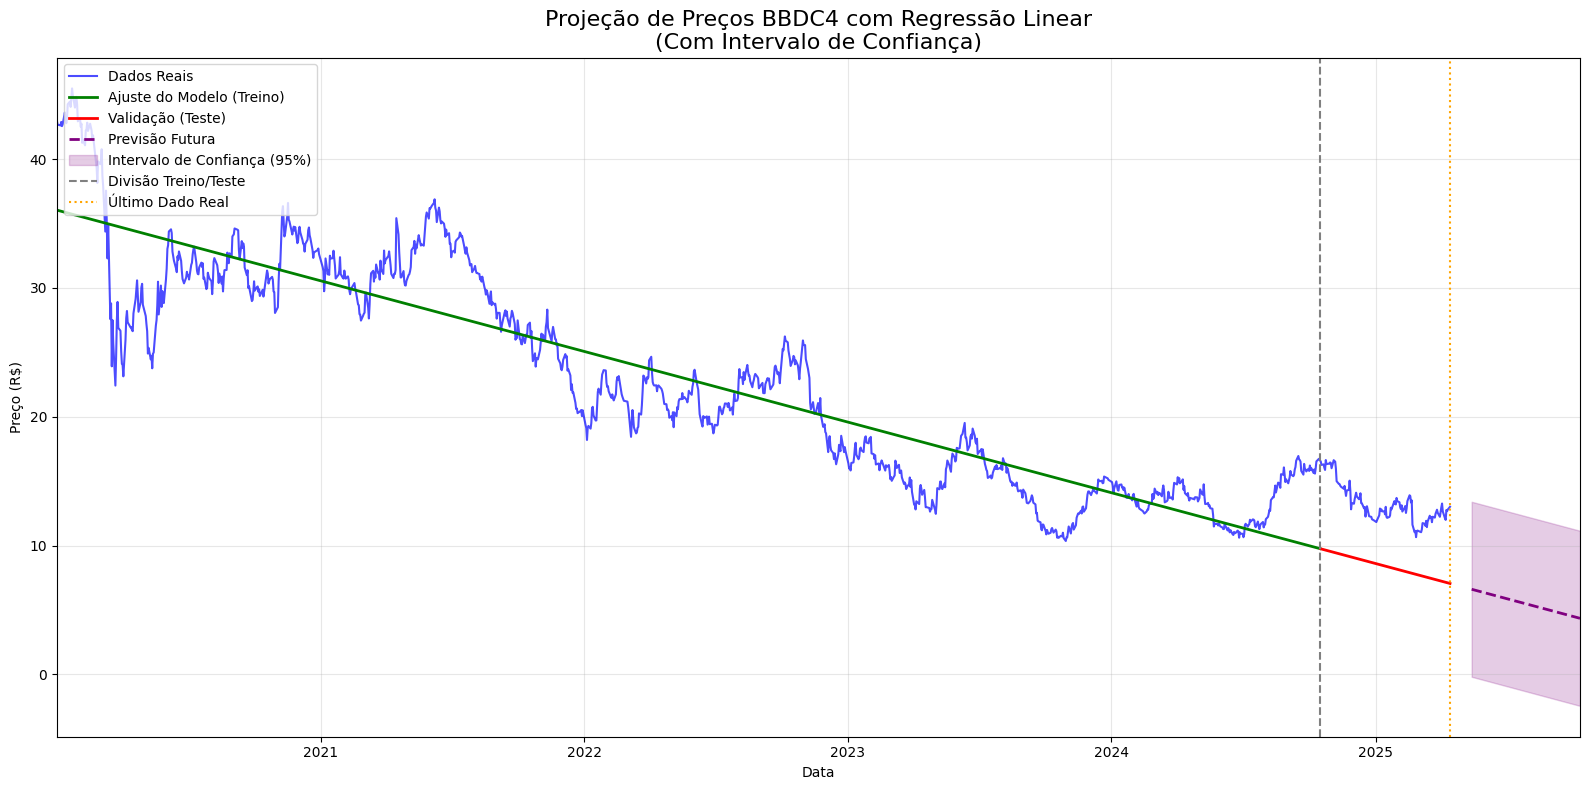


Equação do Modelo: Preço = 11114.31 + -0.015023 * Data


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

# 1. Obter e preparar dados
def get_data():
    codigo = 'LREN3.SA'
    data_inicio = '2020-01-01'
    data_fim = datetime.now().strftime('%Y-%m-%d')

    df = yf.download(codigo, start=data_inicio, end=data_fim)[['Close']]
    df = df.rename(columns={'Close': 'Preco'}).dropna()
    df['Data_ordinal'] = df.index.map(lambda x: x.toordinal())
    return df

# 2. Calcular métricas básicas
def calculate_metrics(y_true, y_pred):
    return {
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'mae': mean_absolute_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred)
    }

# 3. Modelagem e avaliação
def train_and_evaluate(df):
    # Preparar dados
    X = df[['Data_ordinal']].values
    y = df['Preco'].values.reshape(-1, 1)

    # Divisão treino/teste (últimos 6 meses para teste)
    split_date = df.index[-1] - timedelta(days=180)
    train_mask = df.index <= split_date
    test_mask = df.index > split_date

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Treinar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsões
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular erros e intervalo de confiança
    residuals = y_train - y_pred_train
    std_error = np.std(residuals)

    # Avaliação
    metrics_train = calculate_metrics(y_train, y_pred_train)
    metrics_test = calculate_metrics(y_test, y_pred_test)

    return model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error

# 4. Gerar previsões futuras
def generate_future_predictions(model, df, months=6, std_error=None):
    last_date = df.index[-1]
    future_dates = [last_date + timedelta(days=30*i) for i in range(1, months+1)]
    future_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

    future_pred = model.predict(future_ordinal)

    # Calcular intervalos de confiança (95%)
    if std_error is not None:
        n = len(df)
        t_value = stats.t.ppf(0.975, df=n-2)  # Graus de liberdade = n-2
        ci = t_value * std_error * np.sqrt(1 + 1/n + (future_ordinal - df['Data_ordinal'].mean())**2 /
                                         ((df['Data_ordinal'] - df['Data_ordinal'].mean())**2).sum())
        lower_bound = future_pred - ci
        upper_bound = future_pred + ci
    else:
        lower_bound, upper_bound = None, None

    return future_dates, future_pred, lower_bound, upper_bound

# 5. Visualização
def plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_date,
                future_dates=None, future_pred=None, lower_bound=None, upper_bound=None, std_error=None):
    plt.figure(figsize=(16, 8))

    # Dados históricos
    plt.plot(df.index, df['Preco'], label='Dados Reais', color='blue', alpha=0.7)

    # Previsões no período de treino e teste
    plt.plot(df.index[train_mask], y_pred_train, label='Ajuste do Modelo (Treino)', color='green', linewidth=2)
    plt.plot(df.index[test_mask], y_pred_test, label='Validação (Teste)', color='red', linewidth=2)

    # Previsões futuras
    if future_dates is not None:
        plt.plot(future_dates, future_pred, '--', label='Previsão Futura', color='purple', linewidth=2)
        if lower_bound is not None and upper_bound is not None:
            plt.fill_between(future_dates, lower_bound.flatten(), upper_bound.flatten(),
                            color='purple', alpha=0.2, label='Intervalo de Confiança (95%)')

    # Linha de divisão treino/teste
    plt.axvline(x=split_date, color='gray', linestyle='--', label='Divisão Treino/Teste')

    # Linha do último dia real
    last_real_date = df.index[-1]
    plt.axvline(x=last_real_date, color='orange', linestyle=':', label='Último Dado Real')

    plt.title('Projeção de Preços BBDC4 com Regressão Linear\n(Com Intervalo de Confiança)', fontsize=16)
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)

    # Ajustar limites do eixo x para incluir as previsões futuras
    if future_dates is not None:
        plt.xlim([df.index[0], future_dates[-1]])

    plt.tight_layout()
    plt.show()

# Execução principal
def main():
    df = get_data()

    if len(df) < 30:  # Mínimo de dados para análise
        print("Dados insuficientes para análise.")
        return

    model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error = train_and_evaluate(df)
    split_date = df.index[-1] - timedelta(days=180)

    # Gerar previsões futuras
    future_dates, future_pred, lower_bound, upper_bound = generate_future_predictions(model, df, months=6, std_error=std_error)

    # Exibir métricas
    print("\nMétricas de Avaliação:")
    print(f"Treino - RMSE: {metrics_train['rmse']:.2f}, MAE: {metrics_train['mae']:.2f}, R²: {metrics_train['r2']:.2f}")
    print(f"Teste  - RMSE: {metrics_test['rmse']:.2f}, MAE: {metrics_test['mae']:.2f}, R²: {metrics_test['r2']:.2f}")
    print(f"\nErro Padrão dos Resíduos: {std_error:.2f}")

    # Exibir previsões futuras
    print("\nPrevisões para os próximos 6 meses:")
    for date, pred, lb, ub in zip(future_dates, future_pred, lower_bound, upper_bound):
        print(f"{date.strftime('%Y-%m-%d')}: R$ {pred[0]:.2f} (Intervalo: R$ {lb[0]:.2f} - R$ {ub[0]:.2f})")

    # Gráfico
    plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_date,
                future_dates, future_pred, lower_bound, upper_bound)

    # Equação do modelo
    print(f"\nEquação do Modelo: Preço = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.6f} * Data")

if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed



Métricas de Avaliação:
Treino - RMSE: 2.29, MAE: 1.89, R²: 0.03
Teste  - RMSE: 2.59, MAE: 2.33, R²: -4.46

Erro Padrão dos Resíduos: 2.29

Previsões para os próximos 6 meses:
2025-05-14: R$ 20.84 (Intervalo: R$ 16.33 - R$ 25.35)
2025-06-13: R$ 20.87 (Intervalo: R$ 16.36 - R$ 25.38)
2025-07-13: R$ 20.89 (Intervalo: R$ 16.38 - R$ 25.40)
2025-08-12: R$ 20.91 (Intervalo: R$ 16.40 - R$ 25.42)
2025-09-11: R$ 20.93 (Intervalo: R$ 16.42 - R$ 25.44)
2025-10-11: R$ 20.95 (Intervalo: R$ 16.44 - R$ 25.47)


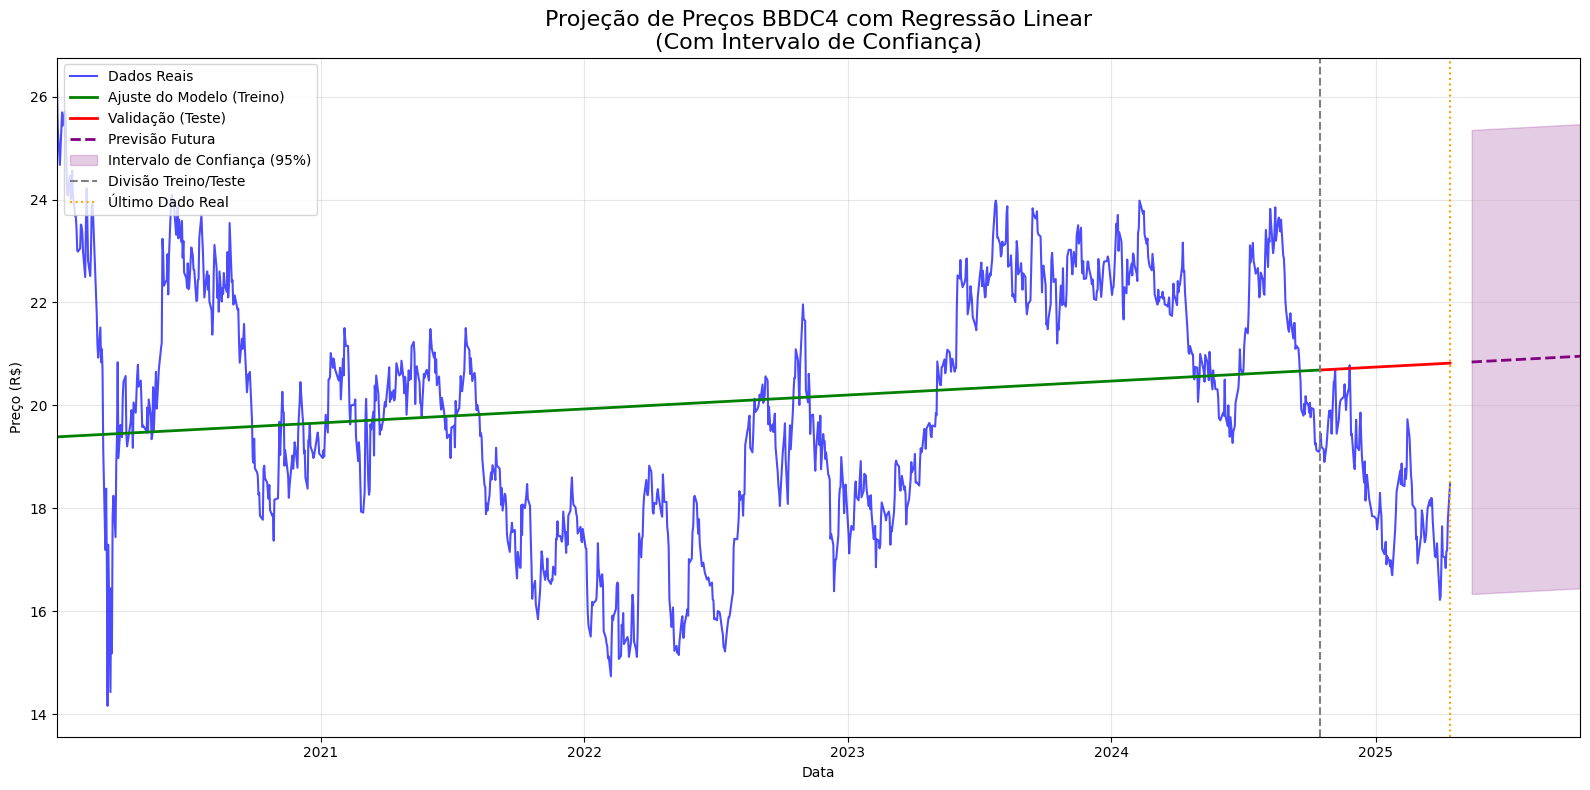


Equação do Modelo: Preço = -528.49 + 0.000743 * Data


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

# 1. Obter e preparar dados
def get_data():
    codigo = 'RAIL3.SA'
    data_inicio = '2020-01-01'
    data_fim = datetime.now().strftime('%Y-%m-%d')

    df = yf.download(codigo, start=data_inicio, end=data_fim)[['Close']]
    df = df.rename(columns={'Close': 'Preco'}).dropna()
    df['Data_ordinal'] = df.index.map(lambda x: x.toordinal())
    return df

# 2. Calcular métricas básicas
def calculate_metrics(y_true, y_pred):
    return {
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'mae': mean_absolute_error(y_true, y_pred),
        'r2': r2_score(y_true, y_pred)
    }

# 3. Modelagem e avaliação
def train_and_evaluate(df):
    # Preparar dados
    X = df[['Data_ordinal']].values
    y = df['Preco'].values.reshape(-1, 1)

    # Divisão treino/teste (últimos 6 meses para teste)
    split_date = df.index[-1] - timedelta(days=180)
    train_mask = df.index <= split_date
    test_mask = df.index > split_date

    X_train, y_train = X[train_mask], y[train_mask]
    X_test, y_test = X[test_mask], y[test_mask]

    # Treinar modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsões
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calcular erros e intervalo de confiança
    residuals = y_train - y_pred_train
    std_error = np.std(residuals)

    # Avaliação
    metrics_train = calculate_metrics(y_train, y_pred_train)
    metrics_test = calculate_metrics(y_test, y_pred_test)

    return model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error

# 4. Gerar previsões futuras
def generate_future_predictions(model, df, months=6, std_error=None):
    last_date = df.index[-1]
    future_dates = [last_date + timedelta(days=30*i) for i in range(1, months+1)]
    future_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

    future_pred = model.predict(future_ordinal)

    # Calcular intervalos de confiança (95%)
    if std_error is not None:
        n = len(df)
        t_value = stats.t.ppf(0.975, df=n-2)  # Graus de liberdade = n-2
        ci = t_value * std_error * np.sqrt(1 + 1/n + (future_ordinal - df['Data_ordinal'].mean())**2 /
                                         ((df['Data_ordinal'] - df['Data_ordinal'].mean())**2).sum())
        lower_bound = future_pred - ci
        upper_bound = future_pred + ci
    else:
        lower_bound, upper_bound = None, None

    return future_dates, future_pred, lower_bound, upper_bound

# 5. Visualização
def plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_date,
                future_dates=None, future_pred=None, lower_bound=None, upper_bound=None, std_error=None):
    plt.figure(figsize=(16, 8))

    # Dados históricos
    plt.plot(df.index, df['Preco'], label='Dados Reais', color='blue', alpha=0.7)

    # Previsões no período de treino e teste
    plt.plot(df.index[train_mask], y_pred_train, label='Ajuste do Modelo (Treino)', color='green', linewidth=2)
    plt.plot(df.index[test_mask], y_pred_test, label='Validação (Teste)', color='red', linewidth=2)

    # Previsões futuras
    if future_dates is not None:
        plt.plot(future_dates, future_pred, '--', label='Previsão Futura', color='purple', linewidth=2)
        if lower_bound is not None and upper_bound is not None:
            plt.fill_between(future_dates, lower_bound.flatten(), upper_bound.flatten(),
                            color='purple', alpha=0.2, label='Intervalo de Confiança (95%)')

    # Linha de divisão treino/teste
    plt.axvline(x=split_date, color='gray', linestyle='--', label='Divisão Treino/Teste')

    # Linha do último dia real
    last_real_date = df.index[-1]
    plt.axvline(x=last_real_date, color='orange', linestyle=':', label='Último Dado Real')

    plt.title('Projeção de Preços BBDC4 com Regressão Linear\n(Com Intervalo de Confiança)', fontsize=16)
    plt.xlabel('Data')
    plt.ylabel('Preço (R$)')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)

    # Ajustar limites do eixo x para incluir as previsões futuras
    if future_dates is not None:
        plt.xlim([df.index[0], future_dates[-1]])

    plt.tight_layout()
    plt.show()

# Execução principal
def main():
    df = get_data()

    if len(df) < 30:  # Mínimo de dados para análise
        print("Dados insuficientes para análise.")
        return

    model, metrics_train, metrics_test, train_mask, test_mask, y_pred_train, y_pred_test, std_error = train_and_evaluate(df)
    split_date = df.index[-1] - timedelta(days=180)

    # Gerar previsões futuras
    future_dates, future_pred, lower_bound, upper_bound = generate_future_predictions(model, df, months=6, std_error=std_error)

    # Exibir métricas
    print("\nMétricas de Avaliação:")
    print(f"Treino - RMSE: {metrics_train['rmse']:.2f}, MAE: {metrics_train['mae']:.2f}, R²: {metrics_train['r2']:.2f}")
    print(f"Teste  - RMSE: {metrics_test['rmse']:.2f}, MAE: {metrics_test['mae']:.2f}, R²: {metrics_test['r2']:.2f}")
    print(f"\nErro Padrão dos Resíduos: {std_error:.2f}")

    # Exibir previsões futuras
    print("\nPrevisões para os próximos 6 meses:")
    for date, pred, lb, ub in zip(future_dates, future_pred, lower_bound, upper_bound):
        print(f"{date.strftime('%Y-%m-%d')}: R$ {pred[0]:.2f} (Intervalo: R$ {lb[0]:.2f} - R$ {ub[0]:.2f})")

    # Gráfico
    plot_results(df, train_mask, test_mask, y_pred_train, y_pred_test, split_date,
                future_dates, future_pred, lower_bound, upper_bound)

    # Equação do modelo
    print(f"\nEquação do Modelo: Preço = {model.intercept_[0]:.2f} + {model.coef_[0][0]:.6f} * Data")

if __name__ == "__main__":
    main()